In [160]:
!pip install opencv-python
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

In [161]:
#Metodo onde recebe uma imagem e retorna o descritor HOG que é o histograma orientado ao gradiente
#o HOG é um descritor de características, ele vai generalizar a imagem de uma forma que o svm possa dizer o que é e o que não é uma face
def hog(img):
    bin_n = 16
    gx = cv2.Sobel(img, cv2.CV_32F, 1, 0)
    gy = cv2.Sobel(img, cv2.CV_32F, 0, 1)
    mag, ang = cv2.cartToPolar(gx, gy)

    bins = np.int32(bin_n*ang/(2*np.pi))
 #método para extrair o descritor das imagens
    bin_cells = bins[:10,:10], bins[10:,:10], bins[:10,10:], bins[10:,10:]
    mag_cells = mag[:10,:10], mag[10:,:10], mag[:10,10:], mag[10:,10:]
    hists = [np.bincount(b.ravel(), m.ravel(), bin_n) for b, m in zip(bin_cells, mag_cells)]
    hist = np.hstack(hists)
    return hist

#deixando todas as imagens com o mesmo tamanho.
#ainda não funciona
#filename = 'database/*.png'
#W = 1000.
#oriimg = cv2.imread(filename,cv2.IMREAD_COLOR)
#height, width, depth = oriimg.shape
#imgScale = W/width
#newX,newY = oriimg.shape[1]*imgScale, oriimg.shape[0]*imgScale
#newimg = cv2.resize(oriimg,(int(199),int(230)))
#cv2.imshow("Show by CV2",newimg)
#cv2.waitKey(0)
#cv2.imwrite("resizeimg.jpg",newimg)

In [162]:
imagens = [cv2.imread(file) for file in sorted(glob.glob("database/*.png"))] # criando arquivo para ler todas as imagens da pasta(database).
#glob é usado Converte o caminho p para um caminho absoluto canônico
hogdata = []
#o for é para criar um laço e ler todas as imagens uma por uma.
for i in range(len(imagens)):
    hogdata.append(hog(imagens[i]))

trainData = np.float32(hogdata).reshape(-1,64) #reshape serve para atribuir resultado a uma matriz.


In [163]:
responses = np.array([1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,0])#rotulando as imagens como verdadeiras e falsas.
#usando o algoritmo SVM para saber o que é uma face, e o que não é!
svm = cv2.ml.SVM_create()
svm.setGamma(5.383)
svm.setC(1)
svm.setKernel(cv2.ml.SVM_LINEAR)
svm.setType(cv2.ml.SVM_C_SVC)
svm.train(trainData,cv2.ml.ROW_SAMPLE,responses)

True

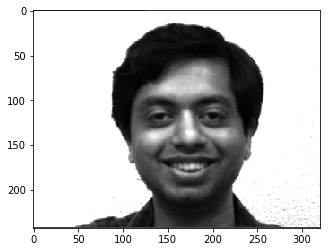

In [212]:
##Tentativa de automatizar teste
#img2 = [cv2.imread(file) for file in sorted(glob.glob("test/*.png"))]
#imgdata = []
#for i in range (len(img2)):
#    imgdata.append(plt.imshow(img2[i]))
    
#img2 = cv2.imread('test/23.png')#pegando a imagem para teste
#plt.imshow(img2)#Mostrando a imagem

img2 = cv2.imread('test/48.png')#pegando a imagem para teste
plt.imshow(img2)#Mostrando a imagem



In [213]:
t = hog(img2)#extraindo descritor hog
ex = np.array([t])#transformando em array numpy
exem=np.float32(ex).reshape(-1,64)#transformando em float.
predicted = svm.predict(exem)
predicted

(0.0, array([[1.]], dtype=float32))